# Map of Sample Sites


In [ ]:
# Python Modules
# 
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import pandas as pd
# !pip install matplotlib-scalebar
from matplotlib_scalebar.scalebar import ScaleBar
# !pip install git+https://github.com/pmdscully/geo_northarrow.git
from geo_northarrow import add_north_arrow

Data from https://www.naturalearthdata.com/downloads/10m-cultural-vectors/

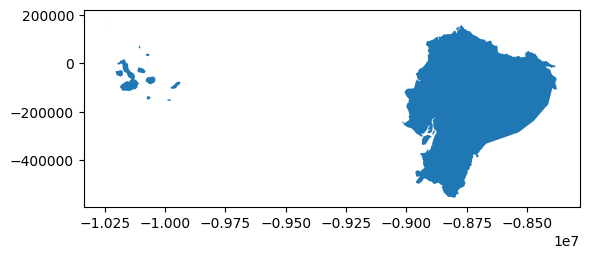

In [ ]:
# Load the Natural Earth dataset from the extracted directory
world = gpd.read_file('natural_earth_vector/10m_cultural/ne_10m_admin_0_countries.shp')
ecuador = world[world['NAME'] == 'YOUR_COUNTRY']
# Ensure YOUR COUNTRY is in the same CRS (WGS84)
ecuador = ecuador.to_crs(epsg=3857)

# Plot OUR COUNTRY
ecuador.plot()
plt.show()

In [ ]:
# Add the sample sites and if csv is not "," specify the seperator
sites = pd.read_csv("YOURFILE.csv", sep=";")
sites.head()


,name,species,type,lat,lon,ele,time
0,AS001,Brosimum_utile,adult,0.539591,-79 144 227 979 704 700,34 313 690 200 000 000,2023-06-23T14:37:37Z
1,AS002,Brosimum_utile,adult,0.539385,-79 144 122 032 448 600,34 363 253 800 000 000,2023-06-23T14:57:54Z
2,AS003,Brosimum_utile,adult,0.539295,-79 143 934 026 360 500,33 542 794 800 000 000,2023-06-23T15:13:53Z
3,AS004,Brosimum_utile,adult,0.539336,-79 144 314 983 859 600,33 094 329 800 000 000,2023-06-23T15:35:44Z
4,AS005,Brosimum_utile,adult,0.538818,-79 144 003 009 423 600,35 433 956 899 999 900,2023-06-23T18:09:41Z


In [ ]:
sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     481 non-null    object 
 1   species  481 non-null    object 
 2   type     481 non-null    object 
 3   lat      481 non-null    float64
 4   lon      481 non-null    object 
 5   ele      481 non-null    object 
 6   time     481 non-null    object 
dtypes: float64(1), object(6)
memory usage: 26.4+ KB


In [ ]:
# as geodataframe
# check that the EPSG matches your data
gdf = gpd.GeoDataFrame(
    sites, geometry=gpd.points_from_xy(sites.lon, sites.lat), crs="EPSG:4326"
) # !!!!! change to your EPSG code !!!!!!!

gdf = gdf.to_crs(epsg=3857) # the base map cannot be added if this is not set

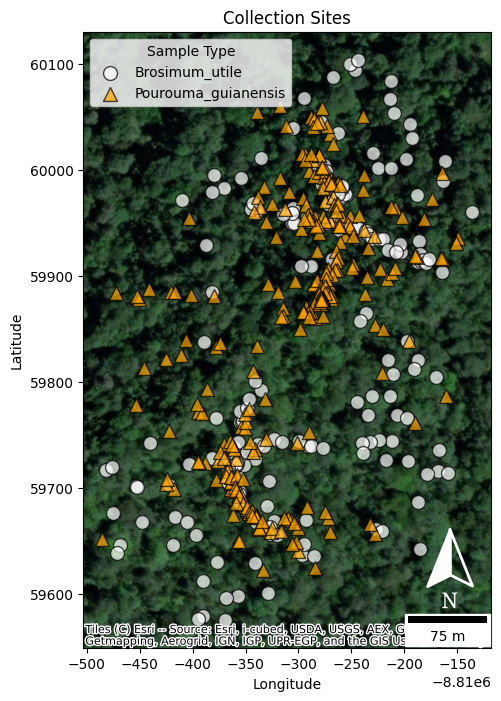

In [ ]:
# Plot the points with category shapes
fig, ax = plt.subplots(figsize=(12, 8))
# Define marker styles for each category
marker_styles = {
    'Category1':'o', 
    'Category2':'^'} # Add more if needed
marker_colors = {
    'Category1':'white',
    'Category2':'orange'} # set colors here
categories = gdf['species'].unique()

# Assign a unique marker to each category
for i, category in enumerate(categories):
    category_data = gdf[gdf['species'] == category]
    marker = marker_styles.get(category,'o') # Cycle through marker styles if there are more categories
    color = marker_colors.get(category,'gray')
    ax.scatter(
        category_data.geometry.x,
        category_data.geometry.y,
        label=category,
        alpha=0.7,
        marker=marker,
        s=100, # Marker size
        color = color,
        edgecolor='black'
    )

# Add Text
ax.set_title('Collection Sites')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend(title='Sample Type')

# add the scale bar
scalebar = ScaleBar(1, units='m', location='lower right')
ax.add_artist(scalebar)

# add the north arrow
add_north_arrow(ax=ax, ylim_pos=.1, color="white",text_scaler=2, text_yT=-1.25)
# Add a basemap
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery)

# Save the figure
output_path = "Figures/Experimental_Sites_Map.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

Coordinates are shown in Web Mercator projection.

In [ ]:
# Uncomment below to convert to HTML

# !jupyter nbconvert --to html GeneticSamplesMap.ipynb

[NbConvertApp] Converting notebook GeneticSamplesMap.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 1059460 bytes to GeneticSamplesMap.html
